#in order to run this you must first must have a kaggle account
#and then download your api key to a kaggle.json file and then 
#upload it into the cell below, then run the following cells to
#download the dataset and do the EDA

In [12]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chrisspears","key":"62381eeebc759ccc35c566d04e1eb8f1"}'}

In [13]:

!pip install pyspark kaggle


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store
!unzip ecommerce-behavior-data-from-multi-category-store.zip


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


In [14]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ECommerceEDA").getOrCreate()

df = spark.read.csv("2019-Nov.csv", header=True, inferSchema=True)


df_sample = df.limit(100000).cache()
df_sample.count()


100000

schema overview

In [ ]:
basic summary stats

In [15]:
df_sample.printSchema()
df_sample.describe().show()


root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)

+-------+----------+-------------------+--------------------+-------------------+------+------------------+-------------------+--------------------+
|summary|event_type|         product_id|         category_id|      category_code| brand|             price|            user_id|        user_session|
+-------+----------+-------------------+--------------------+-------------------+------+------------------+-------------------+--------------------+
|  count|    100000|             100000|              100000|              66160| 84247|            100000|             100000|              100000|
|   mean|      NULL|    

null values

In [18]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import DoubleType, FloatType

null_exprs = []

for field in df_sample.schema.fields:
    cname = field.name
    ctype = field.dataType

    if isinstance(ctype, (DoubleType, FloatType)):
        expr = count(when(col(cname).isNull() | isnan(col(cname)), cname)).alias(f"{cname}_nulls")
    else:
        expr = count(when(col(cname).isNull(), cname)).alias(f"{cname}_nulls")

    null_exprs.append(expr)

df_sample.select(null_exprs).show()


+----------------+----------------+----------------+-----------------+-------------------+-----------+-----------+-------------+------------------+
|event_time_nulls|event_type_nulls|product_id_nulls|category_id_nulls|category_code_nulls|brand_nulls|price_nulls|user_id_nulls|user_session_nulls|
+----------------+----------------+----------------+-----------------+-------------------+-----------+-----------+-------------+------------------+
|               0|               0|               0|                0|              33840|      15753|          0|            0|                 0|
+----------------+----------------+----------------+-----------------+-------------------+-----------+-----------+-------------+------------------+



event type count

In [19]:
df_sample.groupBy("event_type").count().orderBy("count", ascending=False).show()


+----------+-----+
|event_type|count|
+----------+-----+
|      view|97489|
|  purchase| 1422|
|      cart| 1089|
+----------+-----+



average price per event

In [20]:
from pyspark.sql.functions import avg
df_sample.groupBy("event_type").agg(avg("price").alias("avg_price")).show()


+----------+------------------+
|event_type|         avg_price|
+----------+------------------+
|      view|281.24173506754585|
|      cart|307.04546372819055|
|  purchase| 282.4385372714487|
+----------+------------------+



top ten product categories

In [21]:
df_sample.groupBy("category_code").count().orderBy("count", ascending=False).show(10)


+--------------------+-----+
|       category_code|count|
+--------------------+-----+
|                NULL|33840|
|electronics.smart...|24928|
|electronics.audio...| 2813|
|electronics.video.tv| 2732|
|  electronics.clocks| 2660|
|  computers.notebook| 2468|
|       apparel.shoes| 2110|
|appliances.enviro...| 1942|
|appliances.kitche...| 1899|
|appliances.kitche...| 1802|
+--------------------+-----+
only showing top 10 rows



boxplot for price per event

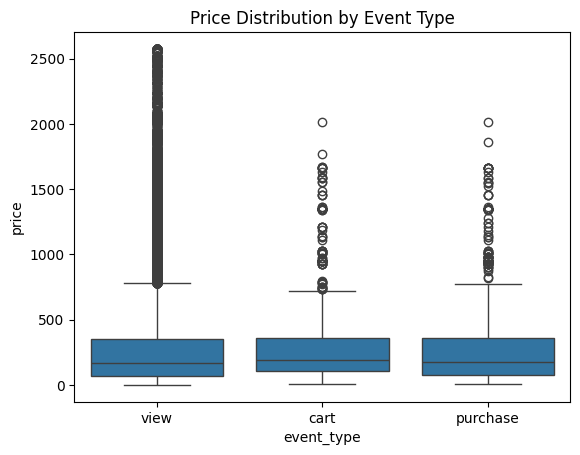

In [22]:
pandas_df = df_sample.select("event_type", "price").toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=pandas_df, x="event_type", y="price")
plt.title("Price Distribution by Event Type")
plt.show()


frequency of top brands

In [23]:
df_sample.filter("brand IS NOT NULL") \
    .groupBy("brand") \
    .count() \
    .orderBy("count", ascending=False) \
    .show(10)


+--------+-----+
|   brand|count|
+--------+-----+
| samsung|11748|
|   apple| 8566|
|  xiaomi| 7400|
|  huawei| 2228|
| lucente| 1460|
|    oppo| 1256|
|    sony| 1186|
|cordiant| 1169|
|   bosch| 1145|
|      lg| 1117|
+--------+-----+
only showing top 10 rows



peak hours 

In [24]:
from pyspark.sql.functions import hour

df_sample.withColumn("hour", hour("event_time")) \
    .groupBy("hour", "event_type") \
    .count() \
    .orderBy("hour") \
    .show(24)


+----+----------+-----+
|hour|event_type|count|
+----+----------+-----+
|   0|      view|10673|
|   0|      cart|  100|
|   0|  purchase|  114|
|   1|      view|13782|
|   1|  purchase|  119|
|   1|      cart|   99|
|   2|      view|31730|
|   2|      cart|  342|
|   2|  purchase|  426|
|   3|      view|41304|
|   3|      cart|  548|
|   3|  purchase|  763|
+----+----------+-----+



In [27]:

!apt-get install git


!git config --global user.email "spearschristopher2002@gmail.com"
!git config --global user.name "chrismicah"


!git clone https://github.com/chrismicah/dsc232r-milestone2.git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
fatal: destination path 'dsc232r-milestone2' already exists and is not an empty directory.


In [28]:
!mv 232r_project_part2.ipynb dsc232r-milestone2/
!cp 2019-Nov.csv dsc232r-milestone2/

mv: cannot stat '232r_project_part2.ipynb': No such file or directory
